In [4]:
import pandas as pd

url = "https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/data_jobs.csv"
df = pd.read_csv(url)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df_NL = df[df['job_country'] == 'Netherlands']

In [6]:
df_skills = df_NL.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
121,Senior Data Engineer,"['python', 'scala', 'sql', 'aws', 'azure', 'gc..."
160,Data Engineer Azure,['azure']
211,Data Engineer,"['python', 'sql', 'aws', 'gcp', 'azure', 'kafk..."
231,Volume Forecast Data Analyst,['tableau']
250,Junior Data Analyst,"['sql', 'sql server', 'excel']"
...,...,...
785491,Data Analyst,NaN
785520,Azure data engineer,['azure']
785521,Platform Implementation Analyst,"['excel', 'word', 'powerpoint']"
785524,ADAS Data Engineer,"['python', 'c++', 'bash', 'shell', 'aws', 'lin..."


In [7]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# New column called skill_count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
7158,['sql'],Data Analyst,154
284,['azure'],Data Engineer,145
4245,['python'],Data Scientist,143
666,['excel'],Data Analyst,131
6701,"['sql', 'python']",Data Analyst,93
...,...,...,...
2436,"['python', 'java', 'scala', 'go', 'bash', 'gcp...",Senior Data Engineer,1
7420,['yarn'],Software Engineer,1
2438,"['python', 'java', 'scala', 'mongodb', 'mongod...",Machine Learning Engineer,1
7422,['zoom'],Data Engineer,1


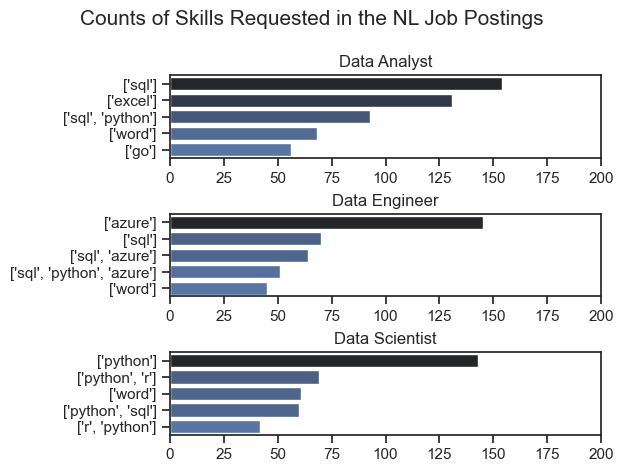

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 200) # make the scales the same

fig.suptitle('Counts of Skills Requested in the NL Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [18]:
df_job_title_count = df_NL['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,6591
1,Data Scientist,4167
2,Data Analyst,4123
3,Senior Data Engineer,1248
4,Business Analyst,1218
5,Software Engineer,1018
6,Senior Data Scientist,803
7,Senior Data Analyst,511
8,Machine Learning Engineer,492
9,Cloud Engineer,460


In [24]:
df_NL = df[(df['job_country'] == 'Netherlands')].dropna(subset=['salary_year_avg'])

In [27]:
job_titles = df_NL['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_NL_top6 = df_NL[df_NL['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_NL_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Business Analyst']

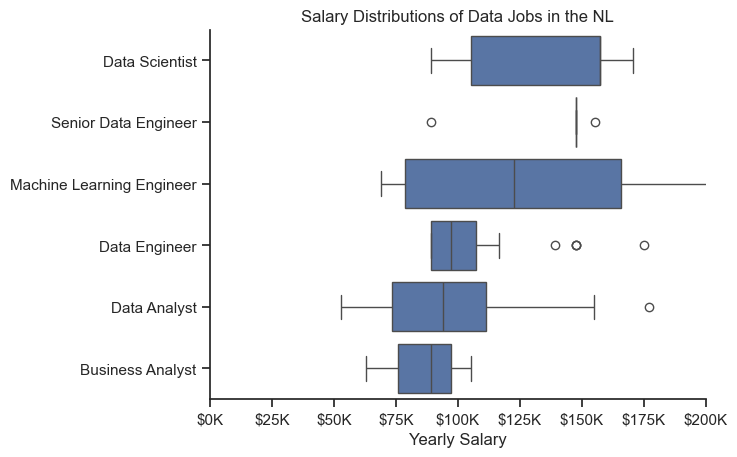

In [33]:
sns.boxplot(data=df_NL_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the NL')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 200000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [26]:
# Only get data analyst jobs in the Netherlands
df_DA_NL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Netherlands')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_NL = df_DA_NL.dropna(subset=['salary_year_avg'])

df_DA_NL = df_DA_NL.explode('job_skills')

df_DA_NL[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
13350,53014.0,"['sql', 'python']"
19026,155000.0,['sap']
134635,98500.0,"['sql', 'c#', 'java', 'r', 'python', 'power bi..."
135041,111202.0,"['sql', 'python', 'r', 'vba', 'pyspark', 'hado..."
141395,70500.0,"['matlab', 'excel', 'power bi']"
183127,105650.0,NaN
184258,74368.5,"['html', 'css', 'javascript']"
217581,177283.0,"['nosql', 'aws', 'azure', 'hadoop', 'spark']"
306044,111175.0,"['sql', 'pyspark', 'tableau']"
320732,89204.0,"['sql', 'sas', 'sas', 'r', 'excel', 'cognos']"


In [32]:
avg_salary = (
    df_NL_top6
    .groupby('job_title_short')['salary_year_avg']
    .mean()
    .reset_index()
    .sort_values(by='salary_year_avg', ascending=False)
)

print(avg_salary)


             job_title_short  salary_year_avg
5       Senior Data Engineer    137420.000000
3             Data Scientist    135382.647059
4  Machine Learning Engineer    126537.500000
2              Data Engineer    107600.652174
1               Data Analyst     98278.025000
0           Business Analyst     85800.000000
